<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7

In [1]:
install.packages(c("coda","mvtnorm","devtools","loo","dagitty"))
devtools::install_github("rmcelreath/rethinking@slim")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘numDeriv’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘abind’, ‘tensorA’, ‘distributional’, ‘Rcpp’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’, ‘checkmate’, ‘matrixStats’, ‘posterior’, ‘V8’





shape (NA -> 1.4.6.1) [CRAN]


Installing 1 packages: shape

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpU0Yxnl/remotes26b5f842971/rmcelreath-rethinking-cbcb8ba/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.13.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(rethinking)

Loading required package: parallel

rethinking (Version 2.13.2)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




## Easy

### 7E1
#### Question
State the three motivating criteria that define information entropy. Try to express each in your  own words.

#### Answer
Entropy is a measure of uncertainty; information resolves that uncertainty (e.g., with evidence).  So entropy *feels* a bit like probability in that both deal with levels of (un)certainty.  It shouldn't be surprising, then, that entropy H is a function of probability.

$$H(X) = \sum_{i=1}^n p(X=x_i) \times log_b(\frac{1}{p(X=x_i)})$$
$$= - \sum_{i=1}^n p(X=x_i) \times log_b(p(X=x_i))$$
$$= -E[log_b(p(X=x_i))]$$

How to interpret?  Think of $log_b(\frac{1}{p(X=x_i)})$ as "surprise": the greater the probability $p(X=x_i)$, the less surprising it is when that event occurs; conversely, the less probable an event $p(X=x_i)$, the more surprising it is when it occurs.  Next, we *weight* the probability of each event $p(X=x_i)$ by its probability of occuring $p(X=x_i)$ and sum over each event $X=x_i$.  This gives us a *weighted average* of surprise for $X$.  We actually use the $log$ of $\frac{1}{p(X=x_i)}$ in order to achieve a few desirable traits for our measure of uncertainty.

From p. 205:
1.   **Continuity:** Just as we want our (un)certainty to be able to slide smoothly from completely uncertain to completely certain, we want informational entropy to do the same.  Probability accomplishes this and, as a function of probability, the formula for $H$ permits the same.
2.   **Proportionality:** All else being equal, more potential outcomes for $X$ should increase our uncertainty about $X$.  You can see how the formula for $H$ accomplishes this.  If instead of being, say, 3 values for $X$ there are 4, $H$ becomes the sum of 4 terms instead of only 3; plus, the additional 4th value for $X$ means that the probability of each possible value has probably decreased--thus increasing the surprise for each.  All told, $H$ increases.
3.   **Additivity:** If we have two events about which we are uncertain, it is desirable to say that our total uncertainty is the sum of those events.  Similarly for more events.  The formula for $H$ accomplishes this by the $\sum$ operator.  We sum the surprise, weighted by its probability of happening, of each possible event.

Additionally, there are some other important features of information entropy no mentioned in the book:
4.   **Non-Negativity:** We cannot be negatively uncertain about an event; we can only be completely certain--which is 0 uncertainty.  The formula for $H$ accomplishes this by its use of probabilities: probabilities also cannot be negative.
5.   **Maximal Value:** Just as there is a minimal entropy (0), there is a maximal entropy.  Maximal entropy occurs when each possible value are equally likely.  You can see this in the formula for $H$: if the probability of any event becomes greater than $\frac{1}{n}$, then the probabilities of other events must decrease...increasing their surprise.  This results in less overall entropy.

> This chapter addresses a concept called "MaxEnt" or "maximal entropy".  This is a similar concept, but it refers to the maximal entropy of a variable under some set of contraints.

There are many other features of informational entropy that we could list.  But we'll stop here.

If you're interested in a deeper but still-understandable resource on information theory, I suggest [Probability and Information: An Integrated Approach 2nd Edition](https://www.amazon.com/Probability-Information-Integrated-David-Applebaum/dp/0521899044) and [Information Theory: A Tutorial Introduction (2nd Edition)](https://www.amazon.com/Information-Theory-Tutorial-Introduction-2nd/dp/1739672704/ref=sr_1_1?crid=QB4WC07L2QV2&dib=eyJ2IjoiMSJ9.HdyNIMnteFZLf7Ghuh6b4KpfMMBis3Cg2Cn4pOhcL08uhNjOVjY5qqMtASytMwiCDZNo8atQ_BvoUOLSeLvzJMSkRrLHGJNdYa3VnLzWgodcgfMRGbJkHt5VFKslyyzX4JYNra34ExCHrvPo7sXCCkIN3NFpJom82G6K_FzCkaU-mOKz-PkQ3CnNhjkBzmYSdIkVdNUmWSE-Di1EjxG_4rWfCra_68Z8zvOI4yM1ub0uKR_QGV0xFv66L61PHlPS25GTH9hCAOTv5q0nezWOtHUX9fO6YEyj17fuskNrV5M.dpOwik_DNtNOYUJyMa8EC825qBdeL0uQJYgazlfU7l0&dib_tag=se&keywords=information+theory&qid=1709823456&s=books&sprefix=information+theory%2Cstripbooks%2C151&sr=1-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1).

### 7E2-7E4
#### Questions
2.   Suppose a coin is weighted such that, when it is tossed and lands on a table, it comes up heads 70% of the time. What is the entropy of this coin?
3.   Suppose a four-sided die is loaded such that, when tossed onto a table, it shows “1” 20%, “2”  25%, “3” 25%, and “4” 30% of the time. What is the entropy of this die?  
4.   Suppose another four-sided die is loaded such that it never shows “4”. The other three sides show equally often. What is the entropy of this die?

#### Answers
We'll group these answers, since they all follow the same process.  We just need to define the probabilities given in the question, then implement our formula for entropy.

For each, I'll calculate entropy in a few different ways, and also compare it to the maximal entropy for that situation described in the question.

Finally, I simulate data according to the situation described in the problem, and then calculate the empirical entropy from that generated data, both manually and with the `entropy` package.

In [ ]:
install.packages("entropy")
library(entropy)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##### 7E2
***Suppose a coin is weighted such that, when it is tossed and lands on a table, it comes up heads 70% of the time. What is the entropy of this coin?***

In [ ]:
p <- c(0.7, 1-0.7)
maxP <- c(0.5, 1-0.5)

(H1 <- -sum(p*log(p)))
(H2 <- sum(p*log(1/p)))

(maxH1 <- -sum(maxP*log(maxP)))
(maxH2 <- sum(maxP*log(1/maxP)))

[1] 0.6108643

[1] 0.6108643

[1] 0.6931472

[1] 0.6931472

In [ ]:
outcomes <- c("heads", "tails")
d <- sample(x=outcomes, size=100, replace=TRUE, prob=p)

(empiricalP <- c(sum(d=="heads")/length(d), sum(d=="tails")/length(d)))

(empiricalH <- -sum(empiricalP*log(empiricalP)))
entropy(d) # entropy package

[1] 0.62 0.38

[1] 0.6640641

[1] 0.6640641

##### 7E3
***Suppose a four-sided die is loaded such that, when tossed onto a table, it shows “1” 20%, “2” 25%, “3” 25%, and “4” 30% of the time. What is the entropy of this die?***

In [ ]:
p <- c(0.2, 0.25, 0.25, 0.3)
maxP <- c(0.25, 0.25, 0.25, 0.25)

(H1 <- -sum(p*log(p)))
(H2 <- sum(p*log(1/p)))

(maxH1 <- -sum(maxP*log(maxP)))
(maxH2 <- sum(maxP*log(1/maxP)))

[1] 1.376227

[1] 1.376227

[1] 1.386294

[1] 1.386294

In [ ]:
outcomes <- c("1", "2", "3", "4")
d <- sample(x=outcomes, size=100, replace=TRUE, prob=p)

(empiricalP <- table(d)/length(d))

(empiricalH <- -sum(empiricalP*log(empiricalP)))
entropy(d) # entropy package

d
   1    2    3    4 
0.23 0.26 0.23 0.28 

[1] 1.38272

[1] 1.38272

##### 7E5
***Suppose another four-sided die is loaded such that it never shows “4”. The other three sides show equally often. What is the entropy of this die?***

In [ ]:
p <- c(1/3, 1/3, 1/3)
maxP <- c(0.25, 0.25, 0.25, 0.25)

(H1 <- -sum(p*log(p)))
(H2 <- sum(p*log(1/p)))

(maxH1 <- -sum(maxP*log(maxP)))
(maxH2 <- sum(maxP*log(1/maxP)))

[1] 1.098612

[1] 1.098612

[1] 1.386294

[1] 1.386294

In [ ]:
outcomes <- c("1", "2", "3")
d <- sample(x=outcomes, size=100, replace=TRUE, prob=p)

(empiricalP <- table(d)/length(d))

(empiricalH <- -sum(empiricalP*log(empiricalP)))
entropy(d) # entropy package

d
   1    2    3 
0.31 0.33 0.36 

[1] 1.09672

[1] 1.09672

## Medium

### 7M1
Write down and compare the definitions of AIC and WAIC. Which of these criteria is most general? Which assumptions are required to transform the more general criterion into a less general one?

#### Answer
Let's start with WAIC.

$$WAIC = -2(lppd_{WAIC} - P_{WAIC})$$

where

$$lppd_{WAIC} = \sum_{i=1}^n log(E_\theta[Pr(y_i | \theta)])
= \sum_{i=1}^nlog(\frac{1}{S} \sum_s Pr(y_i | \theta_s))$$

is the ***log-pointwise-predictive-density*** for WAIC (with uppercase $S$ is the number of posterior draws, lowercase $s$ representing a single posterior draw, and $\theta$ is the estimated posterior parameters from the draw of $s$) and

$$P_{WAIC} = \sum_{i=1}^n Var_\theta[log(Pr(y_i | \theta)]$$

is the ***WAIC penalty term***, which takes the variance of each observation $y_i$ across all parameter estimates $\theta$ from the posterior distribution, then sums them.  The penalty term will tend to be larger for models that are overfit since probability of any observation $y_i$ will change more across the different parameter estimates in the posterior.

Now onto AIC (NOTE: McElreath uses a Bayesian AIC, which uses the posterior distribution.  This is unusual; most discussionss of AIC use a frequentist definition, using the maximum likelihood instead of the posterior).  The formula for AIC has a similar structure to that of WAIC:

$$AIC = -2(lppd_{AIC} - P_{AIC})$$

where

$$lppd_{AIC} = \sum_{i=1}^n log(Pr(y_i | \theta_{MAP}))$$

is the ***log-pointwise-predictive-density*** for AIC of the data, taken at the point value of $\theta$ that maximizes the posterior, and

$$P_{AIC} = \#\theta$$

is the ***AIC penalty term***, which is just the number of parameters in the model.  The intuition here is that models with more parameters are more likely to overfit and should therefore incur a larger penalty.

So the things that distinguish WAIC and AIC are:
*   WAIC considers the entire posterior distribution; AIC considers only a single point, the value of $theta$ that maximizes the posterior.
*   WAIC estimates a penalty based on variance of fit; AIC uses a asymptotic heuristic to assess overfitting.

Thus, WAIC is more general that AIC.  

The WAIC and AIC are similar with very large sample sizes.  In this case, maximum value of the posterior (MAP) is a good approximation for the posterior distribution because the spread of the posterior is minimized such that posterior piles tightly around the MAP.

But that the posterior converges to the MAP is not exactly the reason that AIC and WAIC converge.  Instead, consider both as $n \rightarrow \infty$.

$$WAIC_{n \rightarrow \infty}
= -2(\sum_{i=1}^{n=\infty} log(E_\theta[Pr(y_i | \theta)]) - \sum_{i=1}^{n=\infty} Var_\theta[log(Pr(y_i | \theta)])
= -2(\infty - 0) = -\infty$$

$$AIC_{n \rightarrow \infty}
= -2(\sum_{i=1}^n log(Pr(y_i | \theta_{MAP})) - \# \theta)
= -2(\infty - \# \theta) = -\infty$$

NOTE: As I mentioned above, McElreath uses a slightly unusual definition of AIC.  Usually, the AIC uses $\theta_{MLE}$, which is the value of $\theta$ that maximizes the likelihood, rather than $\theta_{MAP}$.  But the take-home message is the same.  As $n \rightarrow \infty$, AIC and WAIC merge.  To see this in the MLE case, notice that the MLE and MAP converge as $n \rightarrow \infty$; they also tend to converge if a flat prior is used for the posterior estimates.  Then, the argument follows just the same.

### 7M2
Explain the difference between model selection and model comparison. What information is lost under model selection?

#### Answer
Both **model selection** and **model comparison** use methods such as *information criteria* (WAIC), *Pareto-smoothed importance sampling* (PSIS) or *cross validataion* (CV) to rank the models based on their expected performance with new data.  The difference is that model selection...well...selects the best-ranked model to interpret and report; conversely, model comparison retains for use each model.  There is a third option that is only briefly mentioned in this (2nd) edition of the book, but which is expanded upon in the previous (1st) edition: **model ensemble**, where the predictions of the various models are combined in proportion to their performance in WAIC/PSIS/CV.

When we are concerned with making predictions, we're forced to use model ensemble or model selection.  After all, WAIC/PSIS/CV are meant to tell us how well our model is likely to <u>predict</u> unobserved cases.

But if we're concerned with inference, we should use model comparison.  WAIC/PSIS/CV do NOT tell us about the causal validity of our model; thus, better scores do not mean more valid models.  Model selection and model ensemble can discard important information regarding the uncertainty of our our model selection.  For instance, if two models have similar claims to inferential validity, WAIC/PSIS/CV scores can help us determine which model is more likely overfitting the data and therefore less generalizable.

Let's look at an example.  From the book (p.231), we use the `compare()` function get some PSIS outputs from several models.

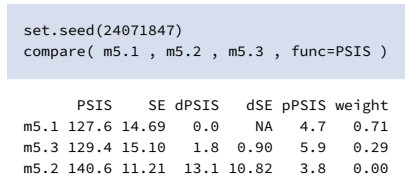

The PSIS scores are the left-most column; the models are listed from *best* PSIS score (top) to *worst* PSIS score (bottom).  In model selection, we would only use the top model `m5.1`.  In model ensemble, we would combine the prediction from each model, weigthing those prediction according to their corresponding value in the `weight` column (so `m5.1` and `m5.3` would get all of the weight).  In model comparison, we would report on each model.  By reporting on each model, and through some systematic testing, we could learn which variables may be more relevant to the system under study.  For instance, is models with explanatory variable X routinely score worse than models without X, we might suspect that X may not be highly relevant to our system.

### 7M3
When comparing models with an information criterion, why must all models be fit to exactly the same observations? What would happen to the information criterion values, if the models were fit to different numbers of observations? Perform some experiments, if you are not sure.

#### Answer
The reason that models must be tested against the same data is almost too obvious to state: *Information criteria is used to assess the fit of a model to a particular set of data; in this way, we can compare models.  It would not make sense to compare the performance of one model on one set of set data to the performance of another model on a separate set of data*.

Regarding the second part of the question, we should not compare the performance of one model on a set of data against the performance of another model on a subset of the same data because information criteria *sums* the deviations of every observation; more observations will tend to translate into larger scores (which implies worse fit).

### 7M4
What happens to the effective number of parameters, as measured by PSIS or WAIC, as a prior becomes more concentrated? Why? Perform some experiments, if you are not sure.

#### Answer
Rember that the "effective number of parameters" refers to the penalty term for PSIS or WAIC.  This raises the question "What does the number of parameters have to do with penalty?".  

The answer is that, all else being equal, models with more parameters are more flexible and thus are more capable of fitting the data.  Such fitting via flexibility can also lead to *overfitting*, which is when the model mistakes some noise in the data for signal; assuming that mirage signal to be present in unseen data (data that arises from the same data-generating process but on which the model has not been trained), the model will have trouble generalizing to unseen data.  Thus, it makes sense to penalize models by their propensity to overfit.

We see the straightforward penalization for parameters with AIC, where the penalty term <u>is</u> the number of parameters.  Again, the idea is that more parameters increase the propensity for overfitting, so AIC penalizes the number of paramters.

But especially outside of normal linear models, the number of parameters is just a rough stand-in for flexibility.  Especially outside of normal linear regression, and especially in Bayesian statistics, the connection between the number of parameters and the flexibility of a model becomes a little loose.  We would be more satisfied is we penalized flexibility directly.  This is the objective of PSIS/WAIC/CV.  (I think) we continue to call the PSIS/WAIC penalties "effective numbers of parameters" for continuity with their predecessor AIC.

Understanding this, we can start reasoning our way through the question.  If features of our model that increase its flexibilty are penalized more heavily by PSIS/WAIC, then features of our model that decrease flexibility will incur less penalty.  What does a more-concentrated prior do, increase or decrease flexibility?  Decreases.  Therefore, a more-concentrated prior will decrease the effective number of parameter i.e., penalty.

I think this may merit an experiement.

Let's start by making some fake data.

In [ ]:
n=25
x <- rnorm(n=n, mean=0, sd=1)
y <- 2*x + rnorm(n=n, mean=0, sd=1)

dlist <- list(x=x, y=y)

So we've made `y` a function of `x`.  Now we'll regress `y ~ x` with a less- and more-concentrated prior, then compare the models.

In [ ]:
m_diffusePrior <- quap(
  alist(
    y ~ dnorm(mu, sigma),
      mu <- b_x * x,
        b_x ~ dnorm(2,10), # diffuse prior, sd=10
      sigma ~ dexp(1)
  ), data=dlist
)

m_concentratedPrior <- quap(
  alist(
    y ~ dnorm(mu, sigma),
      mu <- b_x * x,
        b_x ~ dnorm(2,1), # concentrated prior, sd=1
      sigma ~ dexp(1)
  ), data=dlist
)

round(precis(m_diffusePrior),2)
round(precis(m_concentratedPrior),2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
b_x,1.66,0.19,1.36,1.96
sigma,0.82,0.11,0.64,1.00


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
b_x,1.67,0.19,1.37,1.97
sigma,0.82,0.11,0.64,1.00


So our estimates are very similar between the 2 models.  But which do we expect to be at greater risk of overfitting, the diffuse-prior model or the concentrated-prior model?  We can check this directly with the `compare()` function; I'll compare with both WAIC and PSIS?

In [ ]:
round(compare(m_diffusePrior, m_concentratedPrior, func=WAIC),2)
round(compare(m_diffusePrior, m_concentratedPrior, func=PSIS),2)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_concentratedPrior,66.32,7.29,0.00,NA,2.0,0.56
m_diffusePrior,66.79,7.47,0.46,0.23,2.2,0.44


Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_concentratedPrior,66.91,7.62,0.00,NA,2.28,0.59
m_diffusePrior,67.67,7.95,0.76,0.36,2.67,0.41


You should run every code block from the start of the question to here; the randomly-generated data will give different results, but over several runs you'll see that the outcomes align with our intuitions.  The diffuse-prior model is more likely to overfit, as indicated the `pWAIC` and `pPSIS` output terms, and thereby generalize less well to new data.  Let's see if this latter conclusion is true.

Let's redo this, but with a new more-variable `y2` outcome variable.  If we're correct, the concentrated-prior model should be do a better job of discerning between signal and noise--generating more accurate posterior estimates.

In [ ]:
n=25
x <- rnorm(n=n, mean=0, sd=1)
y2 <- 2*x + rnorm(n=n, mean=0, sd=10)
dlist <- list(x=x, y=y)

m_diffusePrior <- quap(
  alist(
    y2 ~ dnorm(mu, sigma),
      mu <- b_x * x,
        b_x ~ dnorm(2,10), # diffuse prior, sd=10
      sigma ~ dexp(1)
  ), data=dlist
)

m_concentratedPrior <- quap(
  alist(
    y2 ~ dnorm(mu, sigma),
      mu <- b_x * x,
        b_x ~ dnorm(2,1), # concentrated prior, sd=1
      sigma ~ dexp(1)
  ), data=dlist
)

round(precis(m_diffusePrior),2)
round(precis(m_concentratedPrior),2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
b_x,2.32,1.34,0.19,4.46
sigma,7.89,0.92,6.42,9.36


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
b_x,2.12,0.80,0.83,3.40
sigma,7.89,0.92,6.42,9.36


Sure enough, the more-concentrated prior gets closer to the true value of `b_x` (2) than the less-contrated model.  (Again, probably want to rerun several times).

Does this mean that a more-concentrated prior is always best?  Of course not.  In fact, we've kinda cheated here.  We set the prior for `b_x` to center on the actual value.  What if we center the prior somewhere else?

In [ ]:
m_diffusePrior <- quap(
  alist(
    y2 ~ dnorm(mu, sigma),
      mu <- b_x * x,
        b_x ~ dnorm(0,10), # diffuse prior, sd=10
      sigma ~ dexp(1)
  ), data=dlist
)

m_concentratedPrior <- quap(
  alist(
    y2 ~ dnorm(mu, sigma),
      mu <- b_x * x,
        b_x ~ dnorm(0,1), # concentrated prior, sd=1
      sigma ~ dexp(1)
  ), data=dlist
)

round(precis(m_diffusePrior),2)
round(precis(m_concentratedPrior),2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
b_x,2.29,1.34,0.15,4.42
sigma,7.89,0.92,6.42,9.36


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
b_x,0.81,0.82,-0.50,2.11
sigma,8.02,0.94,6.51,9.53


Now the diffuse-prior model does a better job of estimation.  This is despite the fact that the concentrated model still has a better WAIC/PSIS score.  (Rerun several times)

In [ ]:
round(compare(m_diffusePrior, m_concentratedPrior, func=WAIC),2)
round(compare(m_diffusePrior, m_concentratedPrior, func=PSIS),2)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_concentratedPrior,186.97,11.56,0.00,NA,2.24,0.6
m_diffusePrior,187.78,11.53,0.81,2.4,3.06,0.4


Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_diffusePrior,187.58,11.65,0.00,NA,2.98,0.58
m_concentratedPrior,188.20,12.46,0.62,2.65,2.79,0.42


### 7M5-7M6
#### 7M5
Provide an informal explanation of why informative priors reduce overfitting.

#### 7M6
Provide an informal explanation of why overly informative priors result in underfitting.

##### Answers
We saw this in the answer to 7M4.  Overfitting occurs when a model mistakes noise in the data for signal.  Priors essentially tell the model which values to entertain as parameter estimates and how seriously to consider them; broader (less-informed) priors will seriously entertain more possible values, facilitating a broader posterior, while narrower (more-informed) priors will focus on fewer possible estimates, facilitating a narrower posterior.  Broader posteriors, resulting from a broader prior, will necessarily give more probabilty mass to inaccurate parameter values--which is the mistaking of noise for signal and thus overfitting.  The narrower posterior, resulting from a narrower prior, *can* filter out much of this noise by simply failing to consider such values.  But a danger lurks: a narrow prior that has excluded reasonable values will make it difficult for the posterior to give adequate weight to these values--this is underfitting.

## Hard

### 7H1
In 2007, The Wall Street Journal published an editorial (“We’re Number One, Alas”) with a graph of corporate tax rates in 29 countries plotted against tax revenue. A badly fit curve was drawn in (reconstructed  below), seemingly by hand, to make the argument that the relationship between tax rate and tax revenue increases and then declines, such that higher tax rates can actually produce less tax revenue. I want you to actually fit a curve to these data, found in `data(Laffer)`. Consider models that use tax rate to predict tax revenue. Compare, using WAIC or PSIS, a  straight-line model to any curved models you like. What do you conclude about the relationship between tax rate and tax revenue?

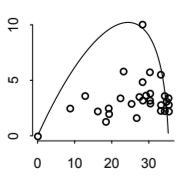

#### Answer
Let's first look at the data.

In [60]:
data(Laffer)
d <- Laffer
str(d)
head(d)

'data.frame':	29 obs. of  2 variables:
 $ tax_rate   : num  0.07 8.81 12.84 16.24 19.18 ...
 $ tax_revenue: num  -0.06 2.45 3.58 2.19 2.46 1.95 1.25 1.59 3.37 2.87 ...


,tax_rate,tax_revenue
,<dbl>,<dbl>
1,0.07,-0.06
2,8.81,2.45
3,12.84,3.58
4,16.24,2.19
5,19.18,2.46
6,19.29,1.95


Next we need to fit a straight-line and curved-line regression; for the curved-line regression, I use a quadratic polynomial to kinda-approximate the drawing.  I don't have a good sense of priors, so I'm going to standardize the variables first.

In [61]:
d$Trate <- standardize(d$tax_rate)
d$Trev <- standardize(d$tax_revenue)

m_line <- quap(
  alist(
    Trev ~ dnorm(mu, sigma),
      mu <- a + b*Trate,
        a ~ dnorm(0,0.2),
        b ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

m_curved <- quap(
  alist(
    Trev ~ dnorm(mu, sigma),
      mu <- a + b1*Trate + b2*Trate^2,
        a ~ dnorm(0,0.2),
        b1 ~ dnorm(0, 0.5),
        b2 ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

We could look at the `precis()` summaries, but I'll just jump to the `compare()`.  I'll use PSIS to compare since we are meant to use PSIS in the next question.

In [67]:
round(compare(m_line, m_curved, func=PSIS),2)

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_curved,92.85,28.65,0.00,NA,9.00,0.62
m_line,93.79,27.15,0.94,2.17,8.48,0.38


You should run that line several times.  You'll see the preferred model change between runs, as well as the `weight`.  I'm actually not sure what is causing that (let me know if you do).  Since these are flipping, I'm not sure what to conclude about the relationship between tax rate and tax revenue.  

But I also notice a warning: `Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.`.  This is the topic of the next question, so let's continue there.

### 7H2
In the Laffer data, there is one country with a high tax revenue that is an outlier. Use PSIS and WAIC to measure the importance of this outlier in the models you fit in the previous problem.  Then use robust regression with a Student’s t distribution to revisit the curve fitting problem. How  much does a curved relationship depend upon the outlier point?

#### Answer
From the image accompanying this problem, we can see the weirdo data point.  Let's use the `PSIS()` function to identify it.

In [68]:
PSIS(m_curved, pointwise=TRUE)

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



PSIS,lppd,penalty,std_err,k
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.641808,-1.3209040,0.26065187,31.51811,0.43893788
1.945329,-0.9726646,0.05305265,31.51811,0.45595321
2.232092,-1.1160458,0.06593994,31.51811,0.50247779
1.878679,-0.9393395,0.02813117,31.51811,0.20861803
1.859680,-0.9298400,0.02350710,31.51811,0.14776505
2.303437,-1.1517185,0.04652220,31.51811,0.14218823
3.213770,-1.6068848,0.12610161,31.51811,0.47134440
3.210313,-1.6051565,0.06740916,31.51811,0.52062628
1.625913,-0.8129567,0.01646632,31.51811,-0.10828250


Setting `pointwise` to `TRUE` breaks down the PSIS values for each observation.
 The `k` values tell us how influential a point is in determining the fit of the regression; high k values indicate an influential data point; overly influential data points make it more difficult for our model to generalize to unseen data.

 Here, we see that the 12th data point is highly influential, with `k = 1.92`.  I suppose that *is* our measure of its influence.  We might gain some intuition if we compared the current output with the identical model trained on a truncated data set that omitted observation 12.  But then we couldn't use PSIS or WAIC to compare since they will not have been trained on identical data.  Instead, perhaps we could use leave-one-out cross validation to train the model on several truncated data sets, each time omitting a different observation.

observation,loo_score
<int>,<dbl>
1,-1.4870646
2,-0.9868770
3,-1.1270708
4,-0.9205831
5,-0.9190627
6,-1.1352410
7,-1.5528912
8,-1.5834350
9,-0.8037079


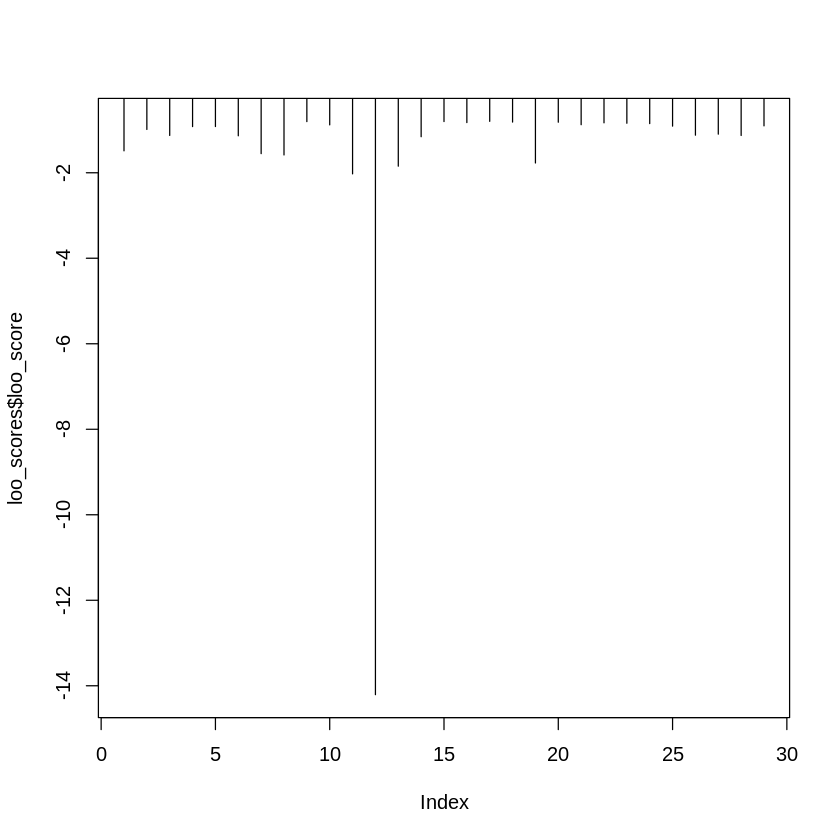

In [69]:
loo_scores <- data.frame(observation = seq_along(1:nrow(d)),
                         loo_score = cv_quap(m_curved, pw=TRUE))

loo_scores

plot(loo_scores$loo_score, type="h")

Here, we see the magnitude of the observation 12's influence.

Finally, we're asked to try a final *robust regression* model, using the t-distribution.

In [74]:
m_line_t <- quap(
  alist(
    Trev ~ dstudent(2, mu, sigma),
      mu <- a + b*Trate,
        a ~ dnorm(0,0.2),
        b ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

m_curved_t <- quap(
  alist(
    Trev ~ dstudent(2, mu, sigma),
      mu <- a + b1*Trate + b2*Trate^2,
        a ~ dnorm(0,0.2),
        b1 ~ dnorm(0, 0.5),
        b2 ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

round(compare(m_line, m_curved, m_line_t, m_curved_t, func=PSIS),2)

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_curved_t,70.60,14.25,0.00,NA,3.83,0.91
m_line_t,75.12,13.87,4.51,4.97,4.11,0.09
m_curved,91.05,27.18,20.45,18.39,8.13,0.00
m_line,94.16,27.44,23.56,18.96,8.68,0.00


The robust regression perform better with `PSIS()`, and the curved-t better than the line-t.